<a href="https://colab.research.google.com/github/KharchenkoAnastasia/customer_analysis_grocery_chain/blob/main/customer_analysis_grocery_chain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of customers of a chain of grocery stores

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [27]:
# Define the path to the Excel file
path_to_file = '/content/Grocery Database.xlsx'

# Load the Excel file
excel_file = pd.ExcelFile(path_to_file)

# Retrieve and display the sheet names
sheet_names = excel_file.sheet_names
print(sheet_names)

['Grosto DB', 'Fact Summary']


In [28]:
# Parse the 'Fact Summary' sheet into a DataFrame
fact_summary_df = excel_file.parse('Fact Summary')

# Display the first few rows to verify the content
print(fact_summary_df.head())

   S.No.     Column Name Description of the Column names
0      1  Receipt Number              Transaction Number
1      2            Date             Date of Transaction
2      3            Year             Year of Transaction
3      4           Month            Month of Transaction
4      5            Time         Time of the transaction


In [ ]:
# Read the Excel file into a DataFrame and display the first 10 rows
df = pd.read_excel(path_to_file)
print(df.head(5))

In [ ]:
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

In [ ]:
# Display a concise summary of the dataset, showing column data types, non-null counts, and memory usage
df.info()



> There are no missing values ​​in the dataframe.



In [ ]:
# Group the data by 'Membership ID' and calculate the count of each membership
df.groupby("Membership ID").size()

### **What is the distribution of customer purchases over the years?**

In [ ]:
# Create a cross-tabulation to analyze the frequency of 'Membership ID' across different years
pd.crosstab(df['Year'], df['Membership ID'])

  

> In total, the data frame contains data on 2,601 unique customers for the period 2016-2019. Accordingly, there are old and new customers who have different shopping experiences in the studied chain of stores.



### **Does the structure of customer spending in the studied retail chain differ in the two reference years - 2016 and 2019?**

In [ ]:
# Calculate the total amount including GST, group by Category and Year, and round the result
df_result = (
    df
    .assign(sum_amount_with_gst=df["Amount"] * (1 + df["GST"]))
    .groupby(["Category", "Year"], as_index=False)
    .agg(total_sum_amount=("sum_amount_with_gst", "sum"))
    .assign(total_sum_amount=lambda x: x["total_sum_amount"].round(2))
)

print(df_result)

In [ ]:
# Create a point plot to visualize total amount by category and year
plt.figure(figsize=(10, 6))

sns.pointplot(
    data=df_result.sort_values(by="total_sum_amount"),
    x="Category",
    y="total_sum_amount",
    hue="Year",
    linestyles="-"
)

plt.xticks(rotation=90)
plt.title("Total Amount by Category and Year")

plt.tight_layout()
plt.show()




> From the 'Total Amount by Category and Year' graph, we observe that the customer spending structure remained remarkably stable between 2016 and 2019. The TOP-3 product categories in terms of spending—'Beauty,' 'Frozen,' and 'Bakery & Breakfast'—retained their leadership positions, while the TOP-3 lowest-spending categories—'Kitchen & Dining,' 'Rice & Cooking Essentials,' and 'Party Supplies'—also remained unchanged.Despite this stability, there was a significant increase in customer spending across all categories during this period. For example, the 'Beauty' category saw a notable growth of 60.94%, and 'Frozen' increased by 50.93%%. This upward trend reflects the effectiveness of the marketing department and the success of the management’s product strategy in driving overall sales growth.



### **Does the number of transactions and the average check size depend on the age (including different genders) of the client?**

In [ ]:
# Group by client identifier, gender, and age to calculate metrics
avg_bill_by_client = df.groupby(["Membership ID", "Age", "Gender"]).agg(
    total_gross_bill=("Gross Bill Amount", "sum"),
    transaction_count=("Receipt Number", "count")
).reset_index()

# Calculate average bill per client
avg_bill_by_client["average_bill"] = (
    avg_bill_by_client["total_gross_bill"] / avg_bill_by_client["transaction_count"]
)

# Split data by gender
women_df = avg_bill_by_client[avg_bill_by_client["Gender"] == "Female"]
men_df = avg_bill_by_client[avg_bill_by_client["Gender"] == "Male"]

In [ ]:
# Function to calculate correlation matrix and plot heatmap
def plot_correlation_heatmap(dataframe, title):
    """
    Plots a correlation heatmap for the given dataframe.

    Parameters:
    dataframe (pd.DataFrame): The input dataframe containing numeric columns.
    title (str): Title of the heatmap.
    """
    correlation_matrix = dataframe.corr()

    # Create a mask for the upper triangle
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

    # Create the heatmap
    plt.figure(figsize=(9, 3))
    sns.heatmap(
        correlation_matrix,
        annot=True,
        linewidths=0.8,
        mask=mask,
        cmap="YlGnBu",
        vmin=-1,
        vmax=1
    )
    plt.title(title)
    plt.yticks(rotation=0)
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Plot correlation heatmaps
plot_correlation_heatmap(
    avg_bill_by_client[["Age", "transaction_count", "average_bill"]],
    "Correlation Matrix for Client Metrics"
)

plot_correlation_heatmap(
    women_df[["Age", "transaction_count", "average_bill"]],
    "Correlation Matrix for Women Clients"
)

plot_correlation_heatmap(
    men_df[["Age", "transaction_count", "average_bill"]],
    "Correlation Matrix for Men Clients"
)




> From the 'Correlation Matrix for Client Metrics' graph, we observe that the correlation coefficients r(Age, transaction_count) = -0.032 and r(Age, average_bill) = -0.0033 are near-zero, indicating no significant linear relationship between age and either the number of transactions or the average bill size. A similar pattern is observed in gender-specific analyses ('Correlation Matrix for Female Customers' and 'Correlation Matrix for Male Customers'), where 'Age', 'average_bill', and 'transaction_count' show negligible correlations. This consistent lack of correlation suggests that the stores cater effectively to the diverse needs of all age groups through a well-coordinated operation and a broad product range that appeals equally across demographics.



### What is the distribution of average bills by gender?

In [ ]:
plt.figure(figsize=(10, 6))

sns.violinplot(y="Gender", x="average_bill", data=avg_bill_by_client,
               inner=None, hue="Gender", palette='Pastel1', legend=False)

sns.swarmplot(data=avg_bill_by_client, x="average_bill", y="Gender", size=1)

plt.title('Distribution of Average Bills by Gender')
plt.ylabel("Gender")
plt.xlabel("Average bill")
plt.show()




> The graph of the distribution of average check size shows that both genders have a roughly similar distribution, characterized by a main peak and a right-skewed tail. The distributions appear somewhat bimodal, with one group concentrated at lower bill amounts and another at moderate spending levels. These slight differences in spending patterns may indicate varying purchasing behaviors or product preferences, warranting further investigation.





### **Buyers of which gender have the highest average check in different cities?**

In [ ]:
# Create a pivot table that shows MEAN of Gross Bill Amount by City and Gender
gender_city_sales = pd.pivot_table(
    data=df,
    index='City',
    columns='Gender',
    values='Gross Bill Amount',
    aggfunc='mean'
).round(2)

# Apply the background gradient styling
gender_city_sales.style.background_gradient(axis=1)



> From the Table, it can be seen that in the vast majority of cities, the average check for women is higher. These findings suggest that marketing campaigns should target female shoppers in most cities, while targeted efforts to male shoppers in Jakarta could help increase engagement and spending.



### **Let's check who shops more often, men or women**

In [ ]:
# Group by City and Gender to count transactions
city_gender_counts = df.groupby(['City', 'Gender'])['Receipt Number'].nunique().unstack(fill_value=0)

# Apply the background gradient styling
city_gender_counts.style.background_gradient(axis=1)



> The table shows that women visit stores significantly more often than men across all cities. This trend is consistent across all cities, with the starkest difference observed in Woodlands, where only 68 visits from men were recorded compared to 1,467 visits from women. These findings suggest that women are the primary in-store customers, potentially due to differences in shopping habits or stronger alignment of the store's offerings with their preferences. Businesses could leverage this insight by tailoring marketing and promotional strategies to further engage female customers."



### **What is the distribution of transactions by gender?**

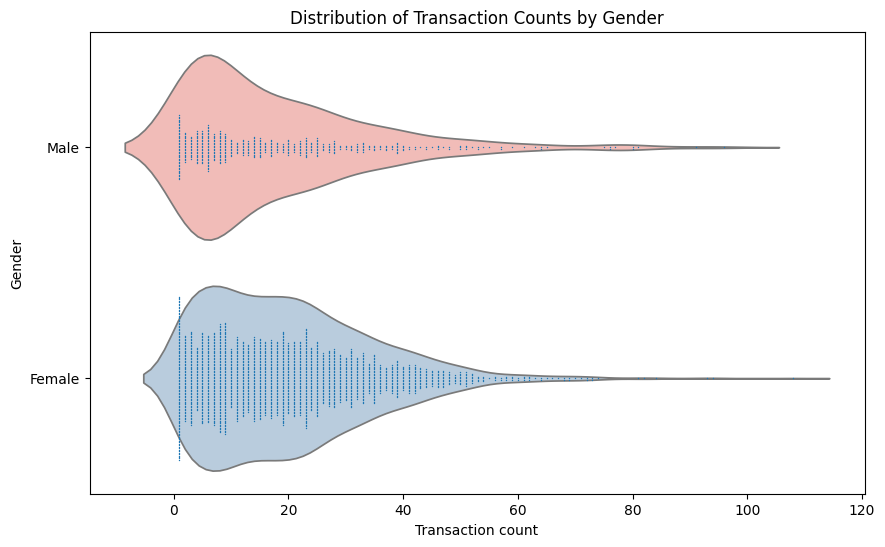

In [16]:
plt.figure(figsize=(10, 6))

sns.violinplot(y="Gender", x="transaction_count", data=avg_bill_by_client,
               inner=None, hue="Gender", palette='Pastel1', legend=False)

sns.swarmplot(data=avg_bill_by_client, x="transaction_count", y="Gender", size=1)

plt.title('Distribution of Transaction Counts by Gender')
plt.ylabel("Gender")
plt.xlabel("Transaction count")
plt.show()



> The plot shows that females constitute a larger portion of moderate-frequency shoppers, whereas males include a smaller but notable group of high-frequency shoppers.

> For Females: Leverage their dominance in the moderate-frequency shopper group by introducing loyalty programs or promotions, such as discounts after a certain number of purchases, to boost transaction counts and encourage repeat visits.

> For Males: Focus on retaining high-frequency 'super shoppers' by offering exclusive perks, such as premium memberships or bulk discounts, to maximize their loyalty and spending.



**Let's analyze which customers of which gender and age group bring the most profit**

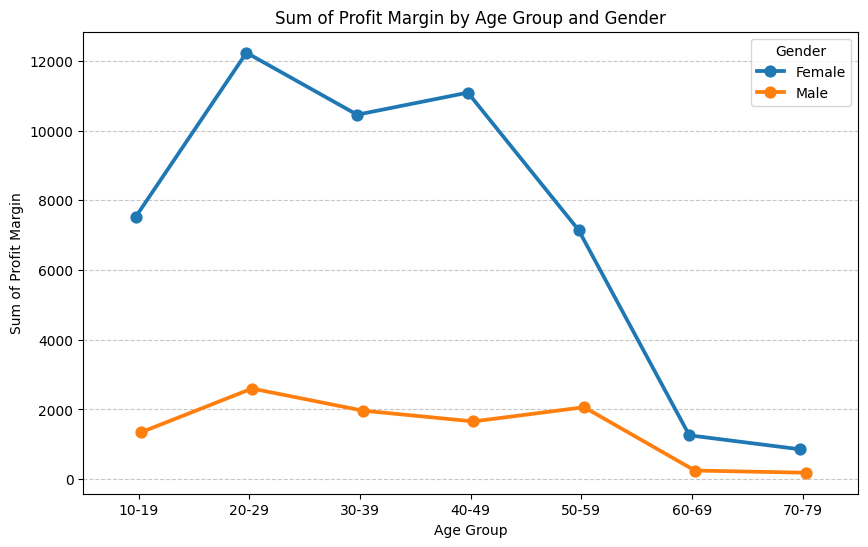

In [17]:
# Add age grouping
# Create age bins dynamically based on the min and max age
age_bins = range(df["Age"].min()// 10 * 10, (df["Age"].max() // 10 + 1) * 10 + 1, 10)
age_labels = [f"{i}-{i+9}" for i in age_bins[:-1]]
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, right=False, labels=age_labels)

# Group by 'Age Group' and 'Gender'
grouped_data = df.groupby(['Age Group', 'Gender'], observed=True)['Profit Margin'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.pointplot(data=grouped_data, x='Age Group', y='Profit Margin', hue='Gender', dodge=True)

plt.title('Sum of Profit Margin by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Sum of Profit Margin')
plt.legend(title='Gender')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()



> The graph shows that women generate significantly more profit for stores compared to men, with the average bill for women being consistently higher. This could be due to women either purchasing higher-margin products, visiting stores more frequently, or a combination of both.
Additionally, women aged 20 to 49 contribute the most profit, likely due to their shopping habits and product preferences. These insights highlight the importance of tailoring marketing campaigns and product offerings to this demographic to further enhance profitability.



###  Which countries and cities give the most profit?

In [18]:
# Group by 'Country' and 'City', calculate the sum of 'Profit Margin'
df.groupby(['Country', 'City'])['Profit Margin'].sum().sort_values(ascending=False)

,,Profit Margin
Country,City,
Singapore,Bedok,14649.59575
Philippines,Manila,14455.63346
Malaysia,Kuala Lumpur,12958.11534
Indonesia,Jakarta,11068.59512
Singapore,Woodlands,7489.29808




> Most profitable countries are Singapore and the Philippines. The cities of Bedok and Manila are the most profitable.



### **Is the profit growing dynamically in each of the countries of sale?**

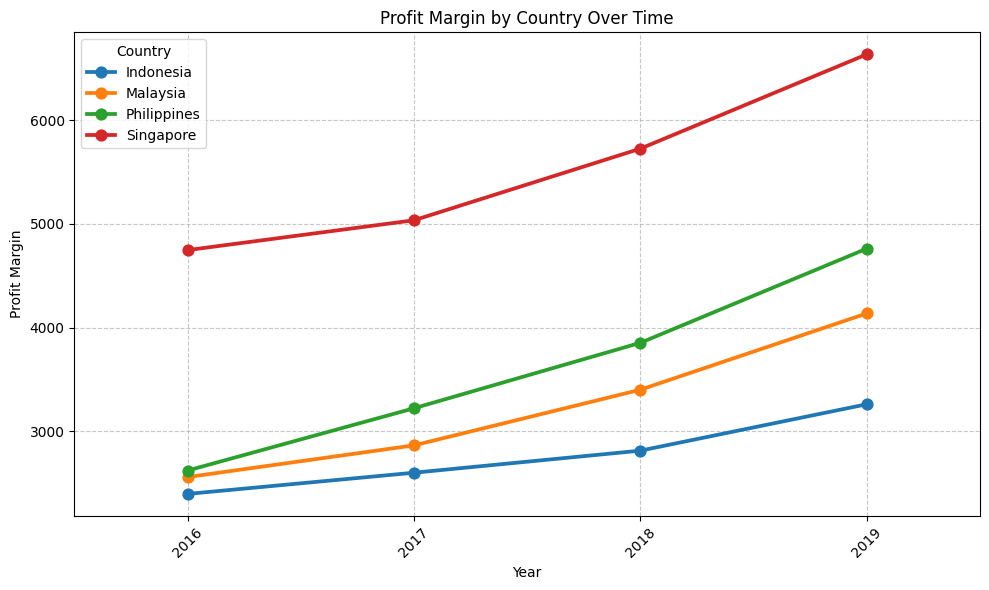

In [19]:
# Calculate profit growth by country and year
profit_growth_by_country =df.groupby(['Year', 'Country'])['Profit Margin'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.pointplot(data=profit_growth_by_country , x='Year', y='Profit Margin', hue='Country')

plt.title('Profit Margin by Country Over Time')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()



> From the "Profit Margin by Country Over Time" chart you can see that each country shows an increase in profit over time.



### **Is there seasonality in sales?**

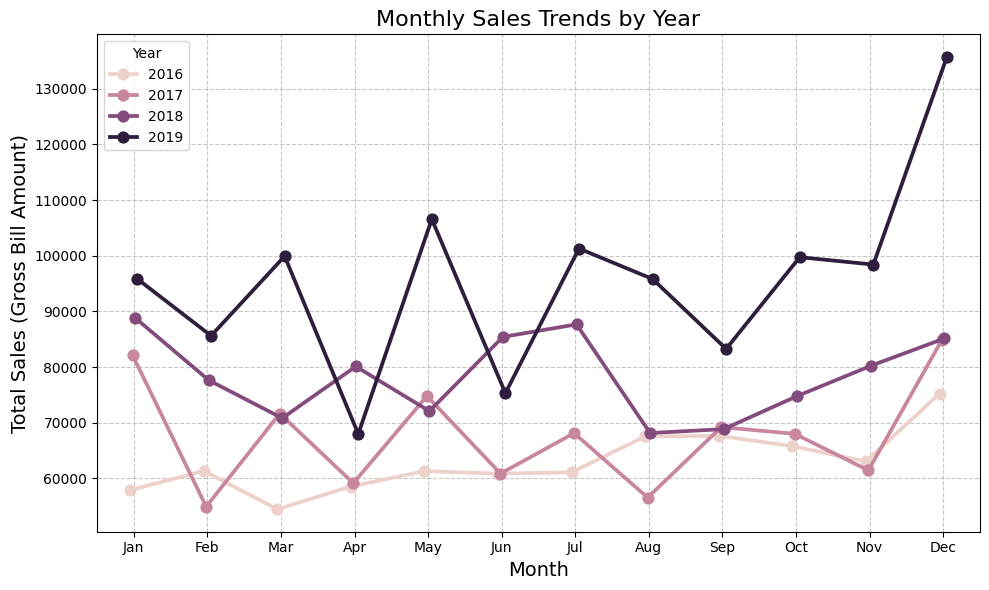

In [20]:
import calendar

# Aggregate monthly sales (using Gross Bill Amount as the sales metric)
monthly_sales = df.groupby(['Year', 'Month'])['Gross Bill Amount'].sum().reset_index()

# Convert month numbers to abbreviated names (Jan, Feb, etc.)
monthly_sales['Month'] = monthly_sales['Month'].apply(lambda x: calendar.month_abbr[x])

plt.figure(figsize=(10, 6))
sns.pointplot(data=monthly_sales, x='Month', y='Gross Bill Amount', hue='Year', dodge=True)

plt.title('Monthly Sales Trends by Year', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Sales (Gross Bill Amount)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Year')
plt.tight_layout()
plt.show()




> The graph shows a consistent increase in sales every December, likely driven by preparations for the New Year and Christmas holidays. To capitalize on this trend, we recommend initiating targeted advertising campaigns from late November and ensuring sufficient stock levels to meet the anticipated surge in demand.



### **What time of day is the most shopping done?**

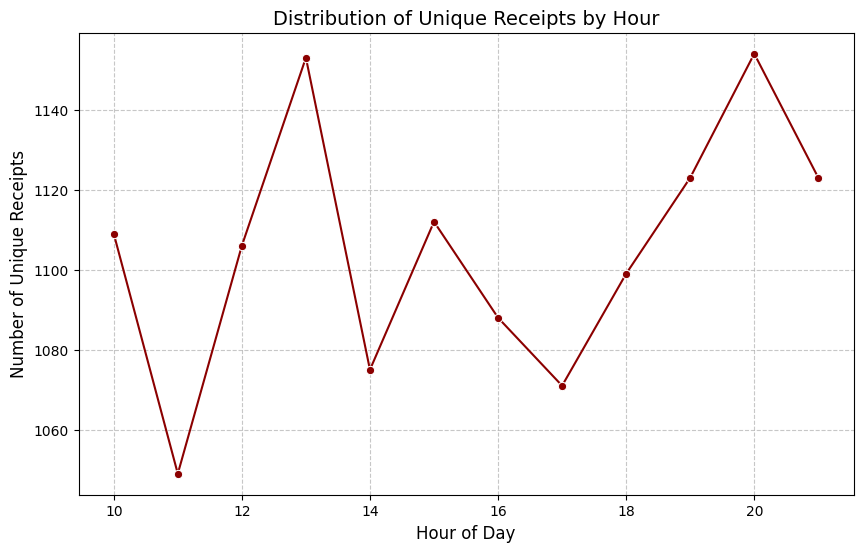

In [21]:
# Extract the hour from your Time column
df['Hour'] = (df['Time'] * 24).astype(int)

# Count unique purchases (transactions) by hour
hourly_purchases=df.groupby("Hour")['Receipt Number'].nunique().reset_index()
hourly_purchases.columns=['Hour', 'Number of Unique Receipts']

plt.figure(figsize=(10, 6))
sns.lineplot(x='Hour', y='Number of Unique Receipts', data=hourly_purchases, marker='o', color='darkred')
plt.title('Distribution of Unique Receipts by Hour', fontsize=14)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Number of Unique Receipts', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()



> The graph indicates that the highest number of purchases occurs at 1:00 p.m. (1,153 receipts) and 8:00 p.m. (1,154 receipts). These peaks are likely associated with the lunch break and the end of the work shift, respectively. This pattern suggests that these time periods represent optimal opportunities for targeted promotions or stocking high-demand items.



### **What is the most profitable product category?**

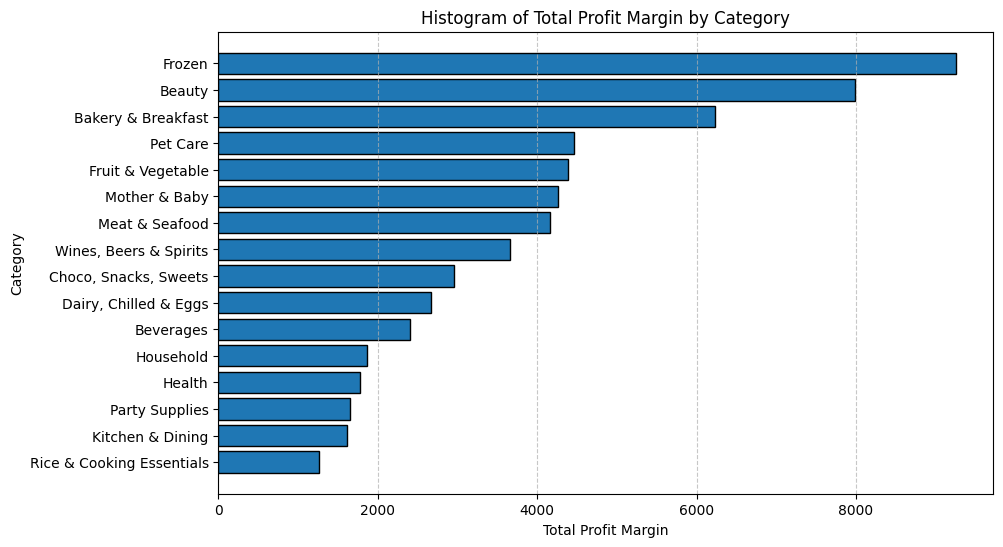

In [22]:
# Group by 'Category' and sum the 'Profit Margin'
profit_by_category = df.groupby('Category')["Profit Margin"].sum().round(2).reset_index()

# Sort by total profit in descending order
profit_by_category=profit_by_category.sort_values(by='Profit Margin')

plt.figure(figsize=(10, 6))
plt.barh(profit_by_category['Category'], profit_by_category['Profit Margin'],  edgecolor='black')
plt.xlabel('Total Profit Margin')
plt.ylabel('Category')
plt.title('Histogram of Total Profit Margin by Category')
plt.grid(axis="x", linestyle='--', alpha=0.7)
plt.show()



> The graph indicates that the most profitable product category is "Frozen". This suggests that frozen goods play a significant role in driving overall profitability. Businesses could consider further promoting this category, expanding the product range, or analyzing customer preferences to sustain and enhance its profitability.



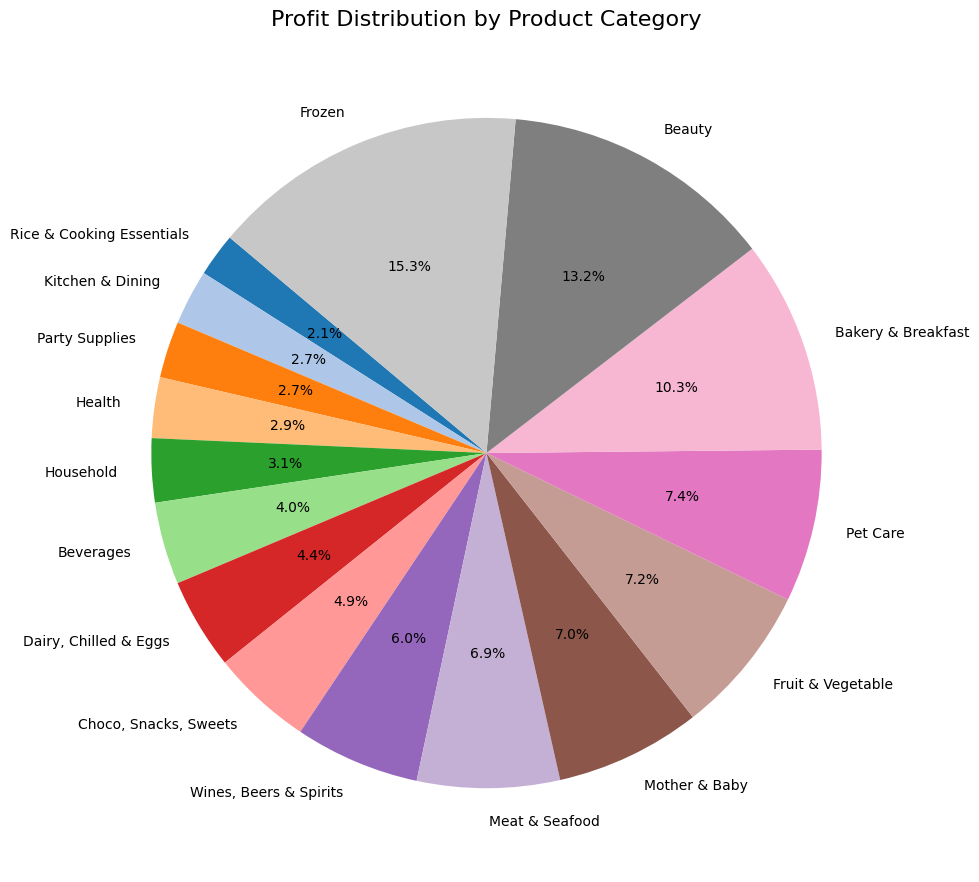

In [23]:
plt.figure(figsize=(10, 10))

plt.pie(
    profit_by_category['Profit Margin'],
    labels=profit_by_category['Category'],
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.tab20.colors
)

plt.title('Profit Distribution by Product Category', fontsize=16)
plt.tight_layout()
plt.show()



> "The 'Profit Distribution by Product Category" pie chart shows that the largest shares of profit come from the "Frozen", "Beauty" and "Bakery & Breakfast" categories. These categories are critical drivers of profitability, suggesting that focused strategies, such as targeted promotions, inventory optimization, or expanded offerings in these segments, could further enhance overall revenue.



### **What is the most profitable subcategory within the most profitable category?**

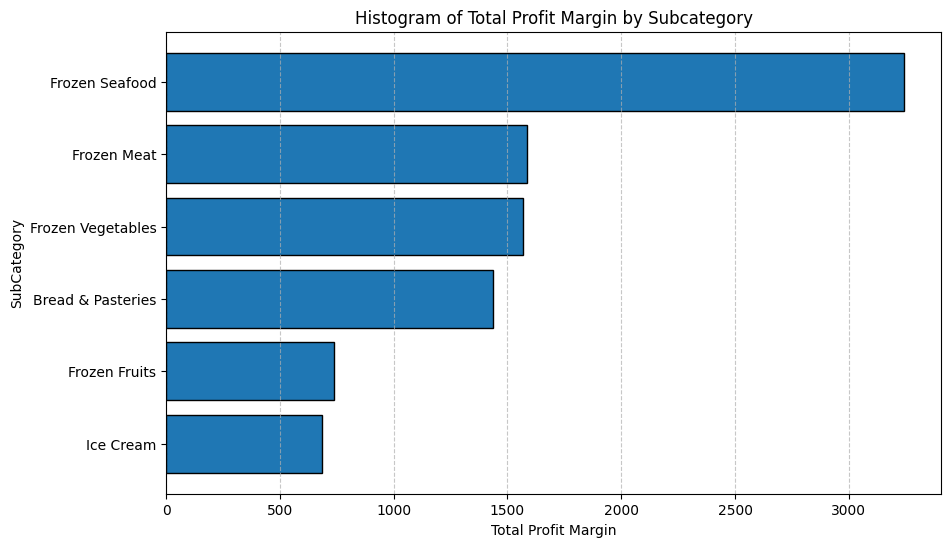

In [24]:
# Group by 'Sub_Category' and sum the 'Profit Margin'
profit_by_subcategory = df[df['Category']=="Frozen"].groupby('Sub_Category')["Profit Margin"].sum().round(2).reset_index()

# Sort by total profit in descending order
profit_by_subcategory=profit_by_subcategory.sort_values(by='Profit Margin')

plt.figure(figsize=(10, 6))
plt.barh(profit_by_subcategory['Sub_Category'], profit_by_subcategory['Profit Margin'],  edgecolor='black')
plt.xlabel('Total Profit Margin')
plt.ylabel('SubCategory')
plt.title('Histogram of Total Profit Margin by Subcategory')
plt.grid(axis="x", linestyle='--', alpha=0.7)
plt.show()



> The graph indicates that the most profitable subcategory of products is Frozen Seafood. Therefore, it is important to always have products of this category in stock.



### **What payment method do buyers in different countries?**

<Figure size 1200x800 with 0 Axes>

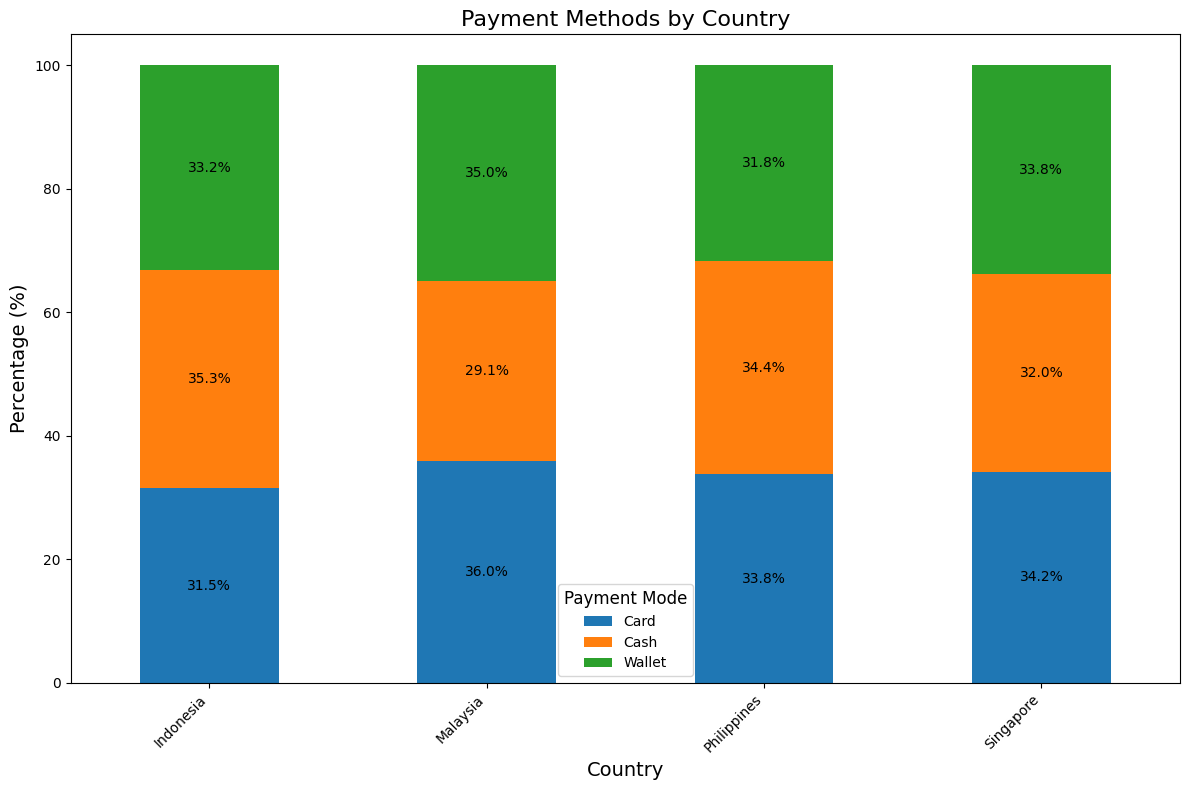

In [25]:
# Group data by Country and Payment Mode, and count receipts
payment_by_country = df.groupby(['Country', 'Payment Mode']).size().reset_index(name='Count')

# Calculate percentage within each country
country_totals = payment_by_country.groupby('Country')['Count'].transform('sum')
payment_by_country['Percentage'] = (payment_by_country['Count'] / country_totals) * 100

pivot_data = payment_by_country.pivot(index='Country', columns='Payment Mode', values='Percentage')

plt.figure(figsize=(12, 8))
ax = pivot_data.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Payment Methods by Country', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Payment Mode', title_fontsize=12)

for container in ax.containers:
    ax.bar_label(container, labels=[f'{v:.1f}%' if v > 5 else '' for v in container.datavalues],
                 label_type='center')

plt.tight_layout()
plt.show()



> The graph highlights payment preferences by country:
*   Indonesia: Strongest preference for cash (35.25%) with the lowest card usage (31.52%)
*   Malaysia: Highest card adoption (35.98%) with lowest cash usage (29.05%)
*   Philippines: Strongest cash preference (34.43%) with balanced card usage (33.81%)
*   Singapore: Most balanced distribution across all payment methods (34.18% card, 32.04% cash, 33.78% wallet)











> Country-Tailored Payment Strategies:
*   Malaysia: Leverage high digital payment adoption by introducing premium card/wallet benefits
*   Indonesia: Implement targeted incentives to shift from cash to digital payments
*   Philippines & Singapore: Maintain balanced support across all payment methods

